## Title: Netflix TV Shows & Movies
Author: Ally McNulty, Daniel Shen, Matthew Tran, Ping Zhang <p>
Time: August 7, 2021

In [1]:
from pandas import Series, DataFrame
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Slide 5-6: Data Cleaning

In [2]:
data = pd.read_csv("netflixdata.csv")

#Determine variables of interest
data = data.drop(columns=['Show Id', 'Director', 'Cast', 'Description'])

#Remove missing values
data = data.dropna()

#Edit Date
data['Date Added'] = pd.to_datetime(data["Date Added"]).dt.strftime('%Y').astype(int)
data['Release Date'] = data['Release Date'].astype(int)
data['Age'] = 2021 - data['Release Date']
data['Age Added'] = data['Date Added'] - data['Release Date']

#Edit Score
data['Imdb Score'] = data['Imdb Score'].str.strip('/10').astype(float)

#Edit Genre
data["Genres"]=data["Genres"].str.split(",").str[0]

#Edit Prod. Country
data["Country Count"]=data["Production Country"].str.split(",").str.len()
data["Production Country"]=np.where(data["Country Count"]!= 1,"Multi Country Production",data["Production Country"])
data = data.drop(columns=["Country Count"])

#Edit Title
data['num_words_title'] = np.nan
for i in range(0,len(data)):
     data.num_words_title.iloc[i] = len(data.Title.iloc[i].split(" "))

data

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Title,Genres,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added,Age,Age Added,num_words_title
1,#Alive,Horror Movies,South Korea,2020,TV-MA,99 min,6.2,Movie,2020,1,0,1.0
2,#AnneFrank - Parallel Stories,Documentaries,Italy,2019,TV-14,95 min,6.4,Movie,2020,2,1,4.0
4,#cats_the_mewvie,Documentaries,Canada,2020,TV-14,90 min,5.0,Movie,2020,1,0,1.0
5,#FriendButMarried,Dramas,Indonesia,2018,TV-G,102 min,7.0,Movie,2020,3,2,1.0
6,#FriendButMarried 2,Dramas,Indonesia,2020,TV-G,104 min,7.0,Movie,2020,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5958,Zozo,Dramas,Multi Country Production,2005,TV-MA,99 min,6.7,Movie,2020,16,15,1.0
5960,Zumbo's Just Desserts,International TV Shows,Australia,2019,TV-PG,1 Season,7.0,TV Show,2020,2,1,3.0
5961,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Documentaries,Multi Country Production,2019,TV-MA,90 min,7.4,Movie,2020,2,1,8.0
5962,الف مبروك,Comedies,Egypt,2009,TV-14,115 min,7.4,Movie,2020,12,11,2.0


### Slide 9: Current Movie & TV Show Offerings

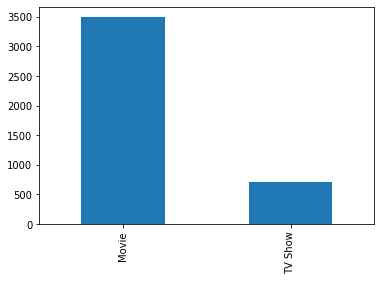

In [3]:
data['Content Type'].value_counts().plot(kind='bar')

In [4]:
movieData = data[data['Content Type'] == 'Movie']
movieData['Duration'] = data['Duration'].str.replace(' min', '')
movieData['Duration'] = movieData['Duration'].astype(int)
movieData

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Title,Genres,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added,Age,Age Added,num_words_title
1,#Alive,Horror Movies,South Korea,2020,TV-MA,99,6.2,Movie,2020,1,0,1.0
2,#AnneFrank - Parallel Stories,Documentaries,Italy,2019,TV-14,95,6.4,Movie,2020,2,1,4.0
4,#cats_the_mewvie,Documentaries,Canada,2020,TV-14,90,5.0,Movie,2020,1,0,1.0
5,#FriendButMarried,Dramas,Indonesia,2018,TV-G,102,7.0,Movie,2020,3,2,1.0
6,#FriendButMarried 2,Dramas,Indonesia,2020,TV-G,104,7.0,Movie,2020,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5957,Zoot Suit,Cult Movies,United States,1981,R,103,7.0,Movie,2021,40,40,2.0
5958,Zozo,Dramas,Multi Country Production,2005,TV-MA,99,6.7,Movie,2020,16,15,1.0
5961,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Documentaries,Multi Country Production,2019,TV-MA,90,7.4,Movie,2020,2,1,8.0
5962,الف مبروك,Comedies,Egypt,2009,TV-14,115,7.4,Movie,2020,12,11,2.0


In [5]:
tvData = data[data['Content Type'] == 'TV Show']
tvData['Duration'] = tvData['Duration'].str.replace(' Seasons', '')
tvData['Duration'] = tvData['Duration'].str.replace('1 Season', '1')
tvData['Duration'] = tvData['Duration'].astype(int)
tvData

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,Title,Genres,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added,Age,Age Added,num_words_title
20,13 Reasons Why,Crime TV Shows,United States,2020,TV-MA,4,7.5,TV Show,2020,1,0,3.0
21,13 Reasons Why: Beyond the Reasons,Crime TV Shows,United States,2019,TV-MA,3,7.7,TV Show,2019,2,0,6.0
48,3%,International TV Shows,Brazil,2020,TV-MA,4,7.5,TV Show,2020,1,0,1.0
52,3Below: Tales of Arcadia,Kids' TV,United States,2019,TV-Y7,2,7.6,TV Show,2019,2,0,4.0
54,44 Cats,Kids' TV,Italy,2018,TV-Y7,2,6.0,TV Show,2020,3,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5932,Z Nation,TV Action & Adventure,United States,2018,TV-MA,5,6.6,TV Show,2019,3,1,2.0
5934,Zac and Mia,Romantic TV Shows,United States,2019,TV-14,2,7.8,TV Show,2021,2,2,3.0
5944,Zig & Sharko,Kids' TV,France,2019,TV-Y7,2,7.0,TV Show,2021,2,2,3.0
5956,Zoo,TV Dramas,United States,2017,TV-14,3,6.6,TV Show,2017,4,0,1.0


### Slide 10: Content Type Production Trends

(2008, 2020)

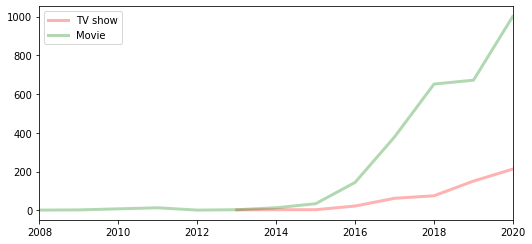

In [6]:
shows = data[data['Content Type']=='TV Show']['Date Added'].value_counts().sort_values()
movies = data[data['Content Type']=='Movie']['Date Added'].value_counts().sort_values()
show_vs_movie = pd.DataFrame({'TV Show':shows, 'Movie':movies})

plt.rcParams["figure.figsize"] = [7.50, 3.50] #TV shows vs Movies production 
plt.rcParams["figure.autolayout"] = True
overlapping = 0.3
line1 = plt.plot(show_vs_movie['TV Show'], c='red', alpha=overlapping, lw=3)
line2 = plt.plot(show_vs_movie['Movie'], c='green', alpha=overlapping,lw=3)
plt.legend(loc = 'best',labels=['TV show', 'Movie'])
plt.xlim(2008,2020)
#movies are still growing in a faster pace than tv shows, but interestingly 2018 tv shows grew more

### Slide 11-12: Largest Movie/TV Show Genres

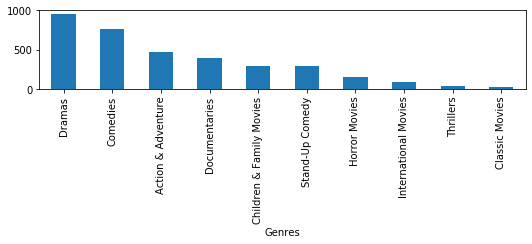

In [7]:
# Largest Genre of movies offered
per_movie_genre=movieData.groupby(["Genres"])["Title"].count()
per_movie_genre.sort_values(ascending=False)[:10].plot(kind='bar')

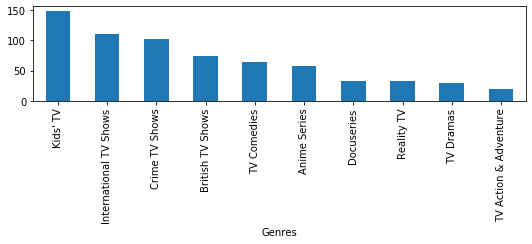

In [8]:
# Largest Genre of tv-shows offered 
per_tv_genre=tvData.groupby(["Genres"])["Title"].count()
per_tv_genre.sort_values(ascending=False)[:10].plot(kind='bar')

### Slide 13-14: Largest Movie/TV Show Ratings

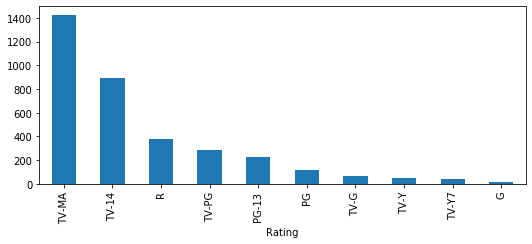

In [9]:
# Largest Rating of movies offered
per_movie_genre=movieData.groupby(["Rating"])["Title"].count()
per_movie_genre.sort_values(ascending=False)[:10].plot(kind='bar')

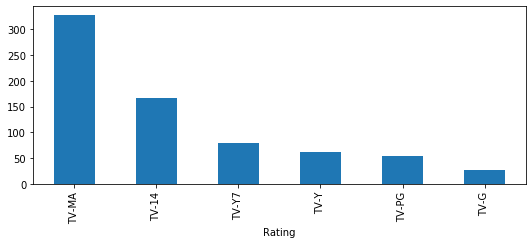

In [10]:
# Largest Rating of tv-shows offered 
per_tv_genre=tvData.groupby(["Rating"])["Title"].count()
per_tv_genre.sort_values(ascending=False)[:10].plot(kind='bar')

### Slide 15-16: Largest Movie/TV show Duration

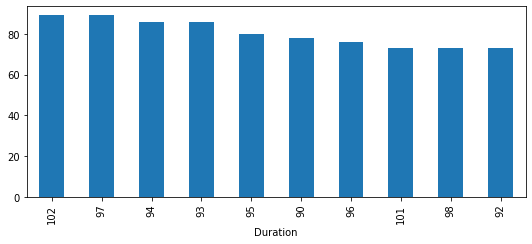

In [11]:
# Largest Duration of movies offered
per_movie_genre=movieData.groupby(["Duration"])["Title"].count()
per_movie_genre.sort_values(ascending=False)[:10].plot(kind='bar')

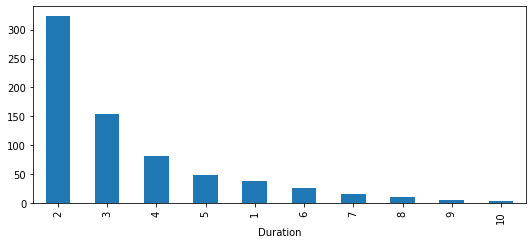

In [12]:
# Largest Duration of tv-shows offered 
per_tv_genre=tvData.groupby(["Duration"])["Title"].count()
per_tv_genre.sort_values(ascending=False)[:10].plot(kind='bar')

### Slide 17-18: Movie/TV Show Age
**(time elapsed between “Release Date” and “Date Added”)**

In [13]:
# How quickly does Netflix add newly released movies?


In [14]:
# How quickly does Netflix add newly released tv shows?


### Slide 19-22: International Production

Text(0, 0.5, 'Production')

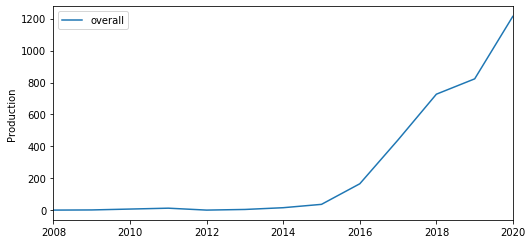

In [19]:
# How has Netflix increased internationally produced tv and movie offerings?
data_d = data.copy().sort_values(by = 'Date Added')
overall = data_d['Date Added'].value_counts() #Started in 2008, reached 100+ movies/shows in 2016, 1000+ in 2018, 4-figure growth since 2020
US = data[data['Production Country']=='United States']['Date Added'].value_counts()
world = data[data['Production Country']!='United States']['Date Added'].value_counts()
netflix_production = pd.DataFrame({'overall':overall, 'US':US, 'world':world})

netflix_production.plot(y='overall',use_index=True)# overall production
plt.tick_params(axis='x')
plt.tick_params(axis='y')
plt.xlim(2008,2020)
plt.ylabel("Production")

Text(0, 0.5, 'Production')

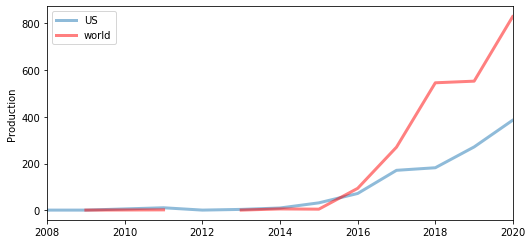

In [20]:
# US vs world production plot
plt.rcParams["figure.figsize"] = [7.50, 3.50] #US vs world production 
plt.rcParams["figure.autolayout"] = True
overlapping = 1.5
line1 = plt.plot(netflix_production[['US']],  alpha=overlapping, lw=3)
line2 = plt.plot(netflix_production[['world']], c='red', alpha=overlapping,
lw=3)
plt.legend(loc = 'best',labels=['US', 'world'])
plt.tick_params(axis='x')
plt.tick_params(axis='y')
plt.xlim(2008,2020)
plt.ylabel("Production")

Text(0, 0.5, 'Production')

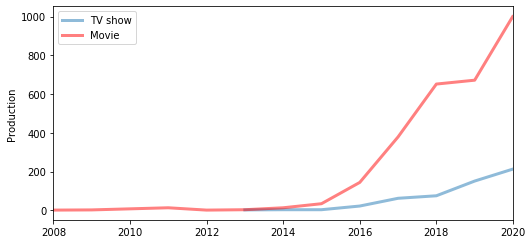

In [21]:
#Has Netflix been offering more tv-shows vs movies in the last 5 years to potentially accommodate for the attention span of viewers?
shows = data[data['Content Type']=='TV Show']['Date Added'].value_counts().sort_values()
movies = data[data['Content Type']=='Movie']['Date Added'].value_counts().sort_values()
show_vs_movie = pd.DataFrame({'TV Show':shows, 'Movie':movies})

plt.rcParams["figure.figsize"] = [7.50, 3.50] #TV shows vs Movies production 
plt.rcParams["figure.autolayout"] = True
overlapping = 1.5
line1 = plt.plot(show_vs_movie['TV Show'],  alpha=overlapping, lw=3)
line2 = plt.plot(show_vs_movie['Movie'], c='red', alpha=overlapping,lw=3)
plt.tick_params(axis='x')
plt.tick_params(axis='y')
plt.legend(loc = 'best',labels=['TV show', 'Movie'])
plt.xlim(2008,2020)
plt.ylabel("Production")
#movies are still growing in a faster pace than tv shows, but interestingly 2018 tv shows grew more

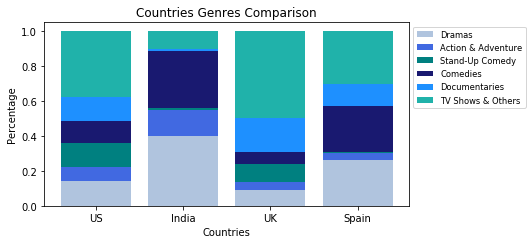

In [22]:
# What kinds of entertainment are the Top 5 production countries creating? 
# What is the tv show genre distribution of the top producing countries?

data['Production Country'].value_counts().head(6).index

US = pd.DataFrame(data[data['Production Country']=='United States']['Genres'].value_counts())
US['percentage']= US['Genres']/US['Genres'].sum()
India = pd.DataFrame(data[data['Production Country']=='India']['Genres'].value_counts())
India['percentage']= India['Genres']/India['Genres'].sum()
UK = pd.DataFrame(data[data['Production Country']=='United Kingdom']['Genres'].value_counts())
UK['percentage']= UK['Genres']/UK['Genres'].sum()
Japan = pd.DataFrame(data[data['Production Country']=='Japan']['Genres'].value_counts())
Japan['percentage']= Japan['Genres']/Japan['Genres'].sum()
Spain = pd.DataFrame(data[data['Production Country']=='Spain']['Genres'].value_counts())
Spain['percentage']= Spain['Genres']/Spain['Genres'].sum()
country_comp = pd.DataFrame({'US':US[:5].index,'India':India[:5].index,'UK':UK[:5].index,'Japan':Japan[:5].index,'Spain':Spain[:5].index})
country_comp1 = pd.DataFrame({'US':US.percentage,'India':India.percentage,'UK':UK.percentage,'Spain':Spain.percentage})

subset = country_comp1.drop(['Dramas','Action & Adventure','Stand-Up Comedy','Comedies','Documentaries'],axis = 0)
plt.bar(country_comp1.columns, country_comp1.loc['Dramas'], color='lightsteelblue')
plt.bar(country_comp1.columns, country_comp1.loc['Action & Adventure'], bottom=country_comp1.loc['Dramas'], color='royalblue')
plt.bar(country_comp1.columns, country_comp1.loc['Stand-Up Comedy'], bottom=country_comp1.loc['Dramas']+country_comp1.loc['Action & Adventure'], color='teal')
plt.bar(country_comp1.columns, country_comp1.loc['Comedies'], bottom=country_comp1.loc['Dramas']+country_comp1.loc['Action & Adventure']+country_comp1.loc['Stand-Up Comedy'], color='midnightblue')
plt.bar(country_comp1.columns, country_comp1.loc['Documentaries'], bottom=country_comp1.loc['Dramas']+country_comp1.loc['Action & Adventure']+country_comp1.loc['Stand-Up Comedy']+country_comp1.loc['Comedies'], color='dodgerblue')
plt.bar(country_comp1.columns, subset.sum(), bottom=country_comp1.loc['Dramas']+country_comp1.loc['Action & Adventure']+country_comp1.loc['Stand-Up Comedy']+country_comp1.loc['Comedies']+country_comp1.loc['Documentaries'], color='lightseagreen')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',fontsize='small',labels = ['Dramas','Action & Adventure','Stand-Up Comedy','Comedies','Documentaries','TV Shows & Others'])
plt.xlabel("Countries")
plt.ylabel("Percentage")
plt.tick_params()
plt.title("Countries Genres Comparison")
plt.tight_layout()
plt.show()

In [23]:
# Productions Comparison: US vs India

US_content = data.groupby(by='Production Country')['Content Type'].value_counts().loc['United States']
India_content = data.groupby(by='Production Country')['Content Type'].value_counts().loc['India']
content_comp = pd.DataFrame({'US':US_content,'India':India_content})
content_comp['US'] = content_comp['US']/content_comp['US'].sum()
content_comp['India'] = content_comp['India']/content_comp['India'].sum()

India_port = pd.DataFrame(data[data['Production Country']=='India'][['Genres','Date Added']])
India_port['a']=1
India_diverse = India_port.groupby(['Genres','Date Added']).agg('sum').sort_values('Date Added')
India_diverse = India_diverse[:35]

In [24]:
India_diverse

,,a
Genres,Date Added,
Dramas,2016,8
Horror Movies,2016,1
Action & Adventure,2017,19
Dramas,2017,19
Stand-Up Comedy,2017,1
Children & Family Movies,2017,1
Classic Movies,2017,1
Comedies,2017,11
Horror Movies,2018,5


### IMDb Score
### Slide 26: Top 10 Movies (Overall Information)

In [49]:
#What are the top 10 movies with the best score?
movie_top10 = movieData.sort_values(by='Imdb Score', ascending=False,inplace=True)
movie_top10 = movieData[['Title','Genres','Production Country','Rating','Duration',
                         'Imdb Score','Age']].iloc[:10,:]
print('The top 10 movies are: ')
display(movie_top10)

The top 10 movies are: 


<ipython-input-49-3f42686a9891>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_top10 = movieData.sort_values(by='Imdb Score', ascending=False,inplace=True)


,Title,Genres,Production Country,Rating,Duration,Imdb Score,Age
740,Bo Burnham: Inside,Stand-Up Comedy,United States,TV-MA,88,9.0,0
3423,No Longer kids,Comedies,Egypt,TV-14,237,9.0,42
1208,David Attenborough: A Life on Our Planet,Documentaries,Multi Country Production,PG,84,9.0,1
2229,In Our Mothers' Gardens,Documentaries,United States,TV-MA,85,8.9,1
893,Care of Kancharapalem,Comedies,India,TV-14,142,8.9,3
4296,Sky Tour: The Movie,Documentaries,Vietnam,TV-G,93,8.8,1
853,Bye Bye London,Comedies,Kuwait,TV-14,177,8.8,40
5576,Unbroken,Documentaries,India,TV-14,109,8.8,2
2507,KD (A) Karuppudurai,Comedies,India,TV-14,116,8.7,2
3044,Merku Thodarchi Malai,Dramas,India,TV-MA,115,8.6,3


In [50]:
#categorical variables
categories1 = movie_top10.loc[:,['Genres', 'Production Country', 'Rating']]
display(categories1.describe())

#numerical variables
numbers1 = movie_top10.loc[:,['Duration','Age','Imdb Score']]
display(numbers1.describe())

,Genres,Production Country,Rating
count,10,10,10
unique,4,6,4
top,Documentaries,India,TV-14
freq,4,4,5


,Duration,Age,Imdb Score
count,10.000000,10.00000,10.000000
mean,124.600000,9.50000,8.850000
std,49.042385,16.63497,0.135401
min,84.000000,0.00000,8.600000
25%,89.250000,1.00000,8.800000
50%,112.000000,2.00000,8.850000
75%,135.500000,3.00000,8.975000
max,237.000000,42.00000,9.000000


### Slide 26: Bottom 10 Movies  (Overall Information)

In [51]:
#What are the bottom 10 movies with the lowest score?
movie_bottom10 = movieData.sort_values(by='Imdb Score', ascending=True,inplace=True)
movie_bottom10 = movieData[['Title','Genres','Production Country','Rating','Duration',
                         'Imdb Score','Age']].iloc[:10,:]
print('The bottom 10 movies are: ')
display(movie_bottom10)

The bottom 10 movies are: 


<ipython-input-51-aaec66398d6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_bottom10 = movieData.sort_values(by='Imdb Score', ascending=True,inplace=True)


,Title,Genres,Production Country,Rating,Duration,Imdb Score,Age
209,Aerials,International Movies,United Arab Emirates,TV-14,90,0.3,5
5396,Time to Dance,Dramas,India,TV-PG,107,0.7,1
2064,Himmatwala,Action & Adventure,India,TV-14,140,0.8,8
1143,Cross: Rise of the Villains,Action & Adventure,United States,R,100,0.9,2
63,5Gang,Comedies,Romania,TV-14,96,0.9,2
3326,Mythily Veendum Varunnu,Horror Movies,India,TV-PG,88,2.0,4
1937,Hajwala: The Missing Engine,Action & Adventure,United Arab Emirates,TV-PG,97,2.2,5
483,B.A. Pass 2,Dramas,India,TV-14,126,2.3,4
1248,Deewana Main Deewana,Comedies,India,TV-14,107,2.3,8
2694,Let's Dance,Comedies,Egypt,TV-14,116,2.4,15


In [52]:
#categorical variables
categories2 = movie_bottom10.loc[:,['Genres', 'Production Country', 'Rating']]
display(categories2.describe())

#numerical variables
numbers2 = movie_bottom10.loc[:,['Duration','Age','Imdb Score']]
display(numbers2.describe())

,Genres,Production Country,Rating
count,10,10,10
unique,5,5,3
top,Comedies,India,TV-14
freq,3,5,6


,Duration,Age,Imdb Score
count,10.000000,10.000000,10.000000
mean,106.700000,5.400000,1.480000
std,16.499495,4.115013,0.824352
min,88.000000,1.000000,0.300000
25%,96.250000,2.500000,0.825000
50%,103.500000,4.500000,1.450000
75%,113.750000,7.250000,2.275000
max,140.000000,15.000000,2.400000


### Slide 27: Top 10 TV shows  (Overall Information)

In [53]:
#What are the top 10 TV shows with the best score?
tv_top10 = tvData.sort_values(by='Imdb Score', ascending=False,inplace=True)
tv_top10 = tvData[['Title','Genres','Production Country','Rating','Duration',
                   'Imdb Score','Age']].iloc[:10,:]
print('The top 10 TV shows are: ')
display(tv_top10)

The top 10 TV shows are: 


<ipython-input-53-ab31cfc13ed0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_top10 = tvData.sort_values(by='Imdb Score', ascending=False,inplace=True)


,Title,Genres,Production Country,Rating,Duration,Imdb Score,Age
800,Breaking Bad,Crime TV Shows,United States,TV-MA,5,9.4,8
461,Avatar: The Last Airbender,Classic & Cult TV,United States,TV-Y7,3,9.3,14
4965,The Last Dance,Docuseries,United States,TV-MA,1,9.2,1
1738,Fullmetal Alchemist: Brotherhood,Anime Series,Japan,TV-14,5,9.0,11
2652,Leah Remini: Scientology and the Aftermath,Docuseries,United States,TV-14,3,9.0,3
2155,Hunter X Hunter (2011),Anime Series,Japan,TV-14,4,9.0,8
2701,Leyla and Mecnun,International TV Shows,Turkey,TV-MA,3,9.0,7
1191,Dark,Crime TV Shows,Multi Country Production,TV-MA,3,8.9,1
3182,Monty Python's Flying Circus,British TV Shows,United Kingdom,TV-14,4,8.9,47
3655,Peaky Blinders,British TV Shows,United Kingdom,TV-MA,5,8.9,2


In [54]:
#categorical variables
categories3 = tv_top10.loc[:,['Genres', 'Production Country', 'Rating']]
display(categories3.describe())

#numerical variables
numbers3 = tv_top10.loc[:,['Duration','Age','Imdb Score']]
display(numbers3.describe())

,Genres,Production Country,Rating
count,10,10,10
unique,6,5,3
top,Crime TV Shows,United States,TV-MA
freq,2,4,5


,Duration,Age,Imdb Score
count,10.000000,10.000000,10.000000
mean,3.600000,10.200000,9.060000
std,1.264911,13.652839,0.177639
min,1.000000,1.000000,8.900000
25%,3.000000,2.250000,8.925000
50%,3.500000,7.500000,9.000000
75%,4.750000,10.250000,9.150000
max,5.000000,47.000000,9.400000


### Slide 27: Bottom 10 TV shows  (Overall Information)

In [55]:
#What are the bottom 10 TV shows with the lowest score?
tv_bottom10 = tvData.sort_values(by='Imdb Score', ascending=True,inplace=True)
tv_bottom10 = tvData[['Title','Genres','Production Country','Rating','Duration',
                   'Imdb Score','Age']].iloc[:10,:]
print('The bottom 10 TV shows are: ')
display(tv_bottom10)

The bottom 10 TV shows are: 


<ipython-input-55-18181a41e7a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_bottom10 = tvData.sort_values(by='Imdb Score', ascending=True,inplace=True)


,Title,Genres,Production Country,Rating,Duration,Imdb Score,Age
3946,Richie Rich,Kids' TV,United States,TV-G,2,3.2,6
675,Bill Nye Saves the World,Stand-Up Comedy & Talk Shows,United States,TV-14,3,3.4,3
1401,Droppin' Cash: Los Angeles,Reality TV,United States,TV-MA,1,3.4,2
2742,Little Singham,Kids' TV,India,TV-Y7,2,3.5,1
4331,Some Assembly Required,Kids' TV,Canada,TV-Y,2,3.5,6
1043,Cloudy with a Chance of Meatballs,Kids' TV,Multi Country Production,TV-Y7,1,3.6,4
3885,Reboot: The Guardian Code,Kids' TV,Canada,TV-Y7,2,3.6,3
3097,Millennials,International TV Shows,Argentina,TV-MA,3,3.8,1
5929,Yummy Mummies,International TV Shows,Australia,TV-MA,2,3.9,2
4574,Teen Mom 2,Reality TV,United States,TV-14,2,4.0,10


In [56]:
#categorical variables
categories4 = tv_bottom10.loc[:,['Genres', 'Production Country', 'Rating']]
display(categories4.describe())

#numerical variables
numbers4 = tv_bottom10.loc[:,['Duration','Age','Imdb Score']]
display(numbers4.describe())

,Genres,Production Country,Rating
count,10,10,10
unique,4,6,5
top,Kids' TV,United States,TV-Y7
freq,5,4,3


,Duration,Age,Imdb Score
count,10.000000,10.000000,10.000000
mean,2.000000,3.800000,3.590000
std,0.666667,2.820559,0.246982
min,1.000000,1.000000,3.200000
25%,2.000000,2.000000,3.425000
50%,2.000000,3.000000,3.550000
75%,2.000000,5.500000,3.750000
max,3.000000,10.000000,4.000000


### Slide 29-30: Take a further look at Duration and Age

Text(0, 0.5, 'Imdb Score')

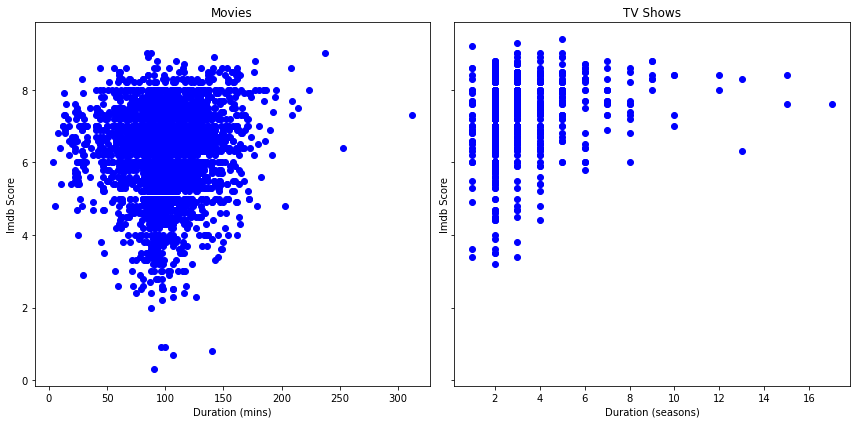

In [71]:
# Does Duration effect IMDb Score?
fig, (ax1, ax2) = subplots(nrows=1,ncols=2,sharey=True,figsize=(12, 6))
ax1.plot(movieData['Duration'], movieData['Imdb Score'], marker='o', color='blue', linestyle='None')
ax1.set_title('Movies')
ax1.set_xlabel('Duration (mins)')
ax1.set_ylabel('Imdb Score')
ax2.plot(tvData['Duration'],tvData['Imdb Score'], marker='o', color='blue', linestyle='None')
ax2.set_title('TV Shows')
ax2.set_xlabel('Duration (seasons)')
ax2.set_ylabel('Imdb Score')

Text(0, 0.5, 'Imdb Score')

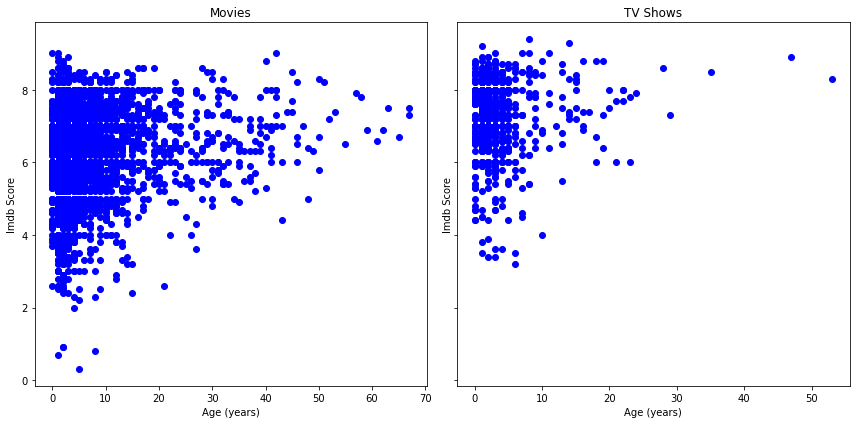

In [143]:
# Does Age effect IMDb Score?
fig, (ax1, ax2) = subplots(nrows=1,ncols=2,sharey=True,figsize=(12, 6))
ax1.plot(movieData['Age'], movieData['Imdb Score'], marker='o', color='blue', linestyle='None')
ax1.set_title('Movies')
ax1.set_xlabel('Age (years)')
ax1.set_ylabel('Imdb Score')
ax2.plot(tvData['Age'],tvData['Imdb Score'], marker='o', color='blue', linestyle='None')
ax2.set_title('TV Shows')
ax2.set_xlabel('Age (years)')
ax2.set_ylabel('Imdb Score')

### Slide 28: Information about distribution of highest average IMDb Score

In [136]:
# Top 5 countries with the highest average scores
print('Top 5 countries with the highest average IMDb scores for movies:','\n',
      movieData.groupby("Production Country")[['Imdb Score']].mean().sort_values(by='Imdb Score',ascending=False)[:5])
print('Top 5 countries with the highest average IMDb scores for TV shows:','\n',
      tvData.groupby("Production Country")[['Imdb Score']].mean().sort_values(by='Imdb Score',ascending=False)[:5])

Top 5 countries with the highest average IMDb scores for movies: 
                     Imdb Score
Production Country            
Iceland                    8.0
Palestine                  7.5
West Germany               7.4
Israel                     7.3
Ireland                    7.2
Top 5 countries with the highest average IMDb scores for TV shows: 
                     Imdb Score
Production Country            
Malaysia                   8.8
Chile                      8.6
Lebanon                    8.4
Indonesia                  8.3
Croatia                    8.0


In [137]:
# Top 5 genres with the highest average scores
print('Top 5 genres with the highest average IMDb scores for movies:','\n',
      movieData.groupby("Genres")[['Imdb Score']].mean().sort_values(by='Imdb Score',ascending=False)[:5])
print('Top 5 genres with the highest average IMDb scores for TV shows:','\n',
      tvData.groupby("Genres")[['Imdb Score']].mean().sort_values(by='Imdb Score',ascending=False)[:5])

Top 5 genres with the highest average IMDb scores for movies: 
                   Imdb Score
Genres                      
Music & Musicals    7.428571
Classic Movies      7.257895
Documentaries       6.998465
Anime Features      6.764706
Movies              6.760000
Top 5 genres with the highest average IMDb scores for TV shows: 
                      Imdb Score
Genres                         
Classic & Cult TV      7.909091
Docuseries             7.840625
Crime TV Shows         7.612621
TV Sci-Fi & Fantasy    7.600000
British TV Shows       7.533784


In [139]:
# Top 5 ratings with the highest average scores
print('Top 5 ratings with the highest average IMDb scores for movies:','\n',
      movieData.groupby("Rating")[['Imdb Score']].mean().sort_values(by='Imdb Score',ascending=False)[:5])
print('Top 5 ratings with the highest average IMDb scores for TV shows:','\n',
      tvData.groupby("Rating")[['Imdb Score']].mean().sort_values(by='Imdb Score',ascending=False)[:5])

Top 5 ratings with the highest average IMDb scores for movies: 
         Imdb Score
Rating            
TV-PG     6.360915
PG-13     6.304911
TV-MA     6.286185
TV-14     6.218876
PG        6.218333
Top 5 ratings with the highest average IMDb scores for TV shows: 
         Imdb Score
Rating            
TV-MA     7.522256
TV-14     7.436145
TV-PG     7.105660
TV-Y7     6.722500
TV-Y      6.674194


In [140]:
# Top 5 Duration with the highest average scores
print('Top 5 duration with the highest average IMDb scores for movies:','\n',
      movieData.groupby("Duration")[['Imdb Score']].mean().sort_values(by='Imdb Score',ascending=False)[:5])
print('Top 5 duration with the highest average IMDb scores for TV shows:','\n',
      tvData.groupby("Duration")[['Imdb Score']].mean().sort_values(by='Imdb Score',ascending=False)[:5])

Top 5 duration with the highest average IMDb scores for movies: 
           Imdb Score
Duration            
237              9.0
208              8.6
177              8.4
224              8.0
195              8.0
Top 5 duration with the highest average IMDb scores for TV shows: 
           Imdb Score
Duration            
9           8.433333
12          8.200000
15          8.000000
7           7.833333
10          7.775000


In [141]:
# Top 5 Age with the highest average scores
print('Top 5 Age with the highest average IMDb scores for movies:','\n',
      movieData.groupby("Age")[['Imdb Score']].mean().sort_values(by='Imdb Score',ascending=False)[:5])
print('Top 5 Age with the highest average IMDb scores for TV shows:','\n',
      tvData.groupby("Age")[['Imdb Score']].mean().sort_values(by='Imdb Score',ascending=False)[:5])

Top 5 Age with the highest average IMDb scores for movies: 
      Imdb Score
Age            
51     8.200000
57     7.900000
45     7.866667
42     7.850000
58     7.800000
Top 5 Age with the highest average IMDb scores for TV shows: 
      Imdb Score
Age            
47     8.900000
28     8.600000
35     8.500000
53     8.300000
15     7.933333
